# Unsupervised Analysis of days of week

Treating crossings each day as features to learn about the relationships between various days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition  import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [2]:
from jupyterworkflow1.data import get_fremont_data
data = get_fremont_data()

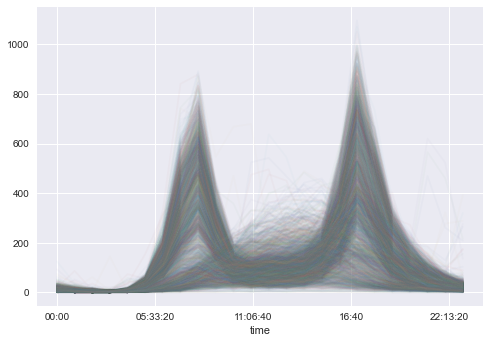

In [3]:
pivoted = data.pivot_table('total', index = data.index.time, columns = data.index.date)
pivoted.plot(legend=False, alpha= 0.03);

## Principal Component Analysis

In [4]:
x = pivoted.fillna(0).T.values
x.shape

(3255, 24)

In [5]:
x2 = PCA(2, svd_solver = 'full').fit_transform(x)
x2.shape

(3255, 2)

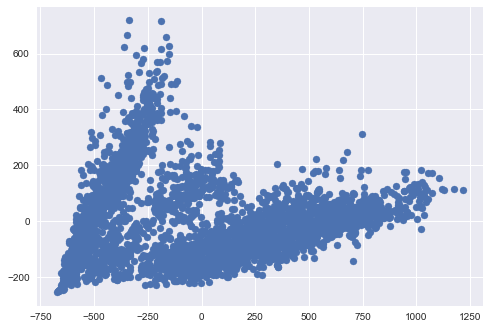

In [6]:
plt.scatter(x2[:,0], x2[:,1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2).fit(x)
labels = gmm.predict(x)

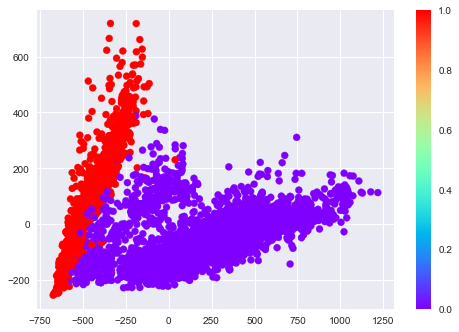

In [8]:
plt.scatter(x2[:,0], x2[:,1], c = labels, cmap='rainbow')
plt.colorbar()

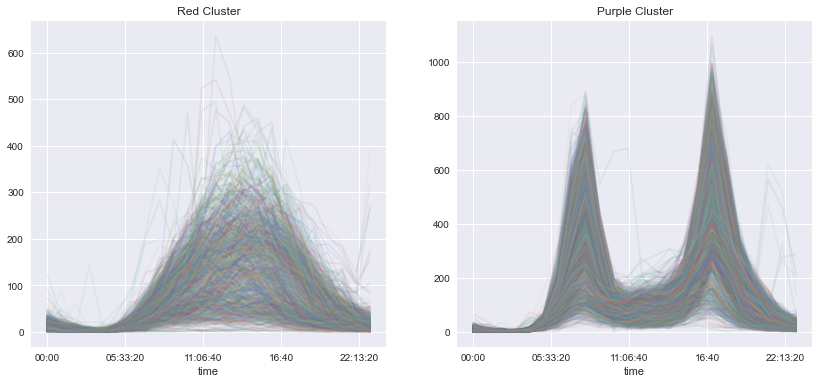

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Red Cluster')
ax[1].set_title('Purple Cluster');

## Comparing with days of week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

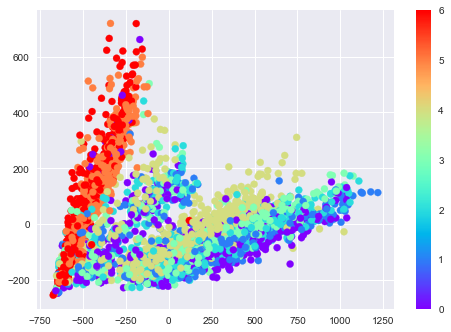

In [11]:
plt.scatter(x2[:,0], x2[:,1], c = dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers

The following points are weekdays with holiday like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', length=2242, freq=None)